### SCanvas

#### Import the needed libraries

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
from tensorflow.keras import layers, models, Sequential # type: ignore
from sklearn.model_selection import train_test_split
import pickle

#### Model 1

In [ ]:
# Function to train the CNN model (or load a pre-trained one)
def build_and_train_model_original():
    (x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #Load Data
    x_train_full = x_train_full.astype('float32') / 255.0 #Normalize //from 0 to 1
    x_test = x_test.astype('float32') / 255.0 #Normalize
    x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

    x_train = x_train.reshape(-1, 28, 28, 1)
    x_val = x_val.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    # Build the CNN model
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.6),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

    # Save the model
    model.save('attendance_digit_model_original.h5')

#### Model 2

In [ ]:
# Function to train the CNN model (or load a pre-trained one)
def build_and_train_model_original_modified():
    (x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #Load Data
    x_train_full = x_train_full.astype('float32') / 255.0 #Normalize //from 0 to 1
    x_test = x_test.astype('float32') / 255.0 #Normalize
    x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

    x_train = x_train.reshape(-1, 28, 28, 1)
    x_val = x_val.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    # Build the CNN model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),   
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

    # Save the model
    model.save('attendance_digit_model_original_modified.h5')

#### Model 3 (Augmentation)

In [48]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np

def build_and_train_model_original_modified_augmented():
    # Load Data
    (x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Normalize data to range [0, 1]
    x_train_full = x_train_full.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Split into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)
    
    # Reshape data for CNN input
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_val = x_val.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    
    # Define data augmentation
    datagen = ImageDataGenerator(
        rotation_range=10,          # Rotate images by up to 10 degrees
        width_shift_range=0.1,      # Shift images horizontally by up to 10% of width
        height_shift_range=0.1,     # Shift images vertically by up to 10% of height
        zoom_range=0.1,             # Zoom in/out by up to 10%
        shear_range=0.1,            # Shear transformation by up to 10%
        fill_mode='nearest'         # Fill new pixels with nearest neighbor
    )
    
    # Fit the data generator to the training data
    datagen.fit(x_train)
    
    # Build the CNN model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model with data augmentation
    model.fit(datagen.flow(x_train, y_train, batch_size=32),
              epochs=10,
              validation_data=(x_val, y_val))
    
    # Save the model
    model.save('attendance_digit_model_original_modified_augmented.h5')
    
    # Evaluate the model on test data (optional, for verification)
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")

##### Model 4 (On our data)

In [49]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Folder-to-label map
FOLDER_LABEL_MAP = {
    'Zero': 0,
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5,
    'Six': 6,
    'Seven': 7,
    'Eight': 8,
    'Nine': 9
}

def load_custom_digit_data(data_dir):
    images = []
    labels = []

    for folder_name, label in FOLDER_LABEL_MAP.items():
        folder_path = os.path.join(data_dir, folder_name)
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                img_path = os.path.join(folder_path, filename)
                img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
                img_array = img_to_array(img) / 255.0  # Normalize
                images.append(img_array)
                labels.append(label)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

def build_and_train_model_from_custom_data(data_dir='your_data_folder'):
    # Load and preprocess data
    images, labels = load_custom_digit_data(data_dir)
    images = images.reshape(-1, 28, 28, 1)

    # Build CNN model
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.6),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train on all data (no validation split)
    model.fit(images, labels, epochs=10, batch_size=32)

    # Save the model
    model.save('attendance_digit_model_our_data.h5')


#### Model 5 (on our data with augmentation)

In [59]:
# Folder-to-label map
FOLDER_LABEL_MAP = {
    'Zero': 0,
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5,
    'Six': 6,
    'Seven': 7,
    'Eight': 8,
    'Nine': 9
}

def load_custom_digit_data(data_dir):
    images = []
    labels = []

    for folder_name, label in FOLDER_LABEL_MAP.items():
        folder_path = os.path.join(data_dir, folder_name)
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                img_path = os.path.join(folder_path, filename)
                img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
                img_array = img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(label)

    return np.array(images), np.array(labels)

def augment_data(images, labels, augment_size=2):
    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1
    )

    augmented_images = []
    augmented_labels = []

    for i in range(len(images)):
        image = images[i].reshape((1, 28, 28, 1))
        label = labels[i]

        aug_iter = datagen.flow(image, batch_size=1)
        for _ in range(augment_size):
            aug_img = next(aug_iter)[0]
            augmented_images.append(aug_img)
            augmented_labels.append(label)

    return np.array(augmented_images), np.array(augmented_labels)

def build_and_train_model_from_custom_data_augmented(data_dir='your_data_folder'):
    # Load and preprocess data
    images, labels = load_custom_digit_data(data_dir)
    images = images.reshape(-1, 28, 28, 1)

    # Augment the data
    augmented_images, augmented_labels = augment_data(images, labels, augment_size=9)

    # Combine original and augmented data
    all_images = np.concatenate((images, augmented_images), axis=0)
    all_labels = np.concatenate((labels, augmented_labels), axis=0)

    # Shuffle the dataset
    indices = np.arange(all_images.shape[0])
    np.random.shuffle(indices)
    all_images = all_images[indices]
    all_labels = all_labels[indices]

    # Build CNN model
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.6),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(all_images, all_labels, epochs=10, batch_size=32)

    # Save the model
    model.save('attendance_digit_model_our_data_augmented.h5')


#### Model 6

In [ ]:
# Model 6
def build_and_train_model_6():
    # 1. Load and preprocess MNIST
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0


    # 2. Define the CNN model
    model = models.Sequential([
        layers.Conv2D(25, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

     # 3. Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # 4. Train the model
    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=128,
        validation_split=0.1
    )

    # 5. Evaluate on test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"\nTest accuracy: {test_acc:.4f}")

    # 6. Save the model
    model.save("model6.h5")
    print("Model saved as mnist_resnet.h5")

#### Train the models

In [ ]:
#build_and_train_model_original() #train model 1

c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 122s 77ms/step - accuracy: 0.8496 - loss: 0.5368 - val_accuracy: 0.9816 - val_loss: 0.0627
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 114s 76ms/step - accuracy: 0.9731 - loss: 0.0885 - val_accuracy: 0.9881 - val_loss: 0.0428
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 124s 82ms/step - accuracy: 0.9831 - loss: 0.0562 - val_accuracy: 0.9881 - val_loss: 0.0360
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 132s 88ms/step - accuracy: 0.9854 - loss: 0.0438 - val_accuracy: 0.9902 - val_loss: 0.0355
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 133s 89ms/step - accuracy: 0.9893 - loss: 0.0338 - val_accuracy: 0.9904 - val_loss: 0.0362
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 94ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9906 - val_loss: 0.0344
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 140s 93ms/step - accuracy: 0.9922 - loss: 0.0245 - val_accuracy: 0.9927 - val_loss: 0.0296
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 133s 89ms/step - accuracy: 

Test Accuracy: 0.9916
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


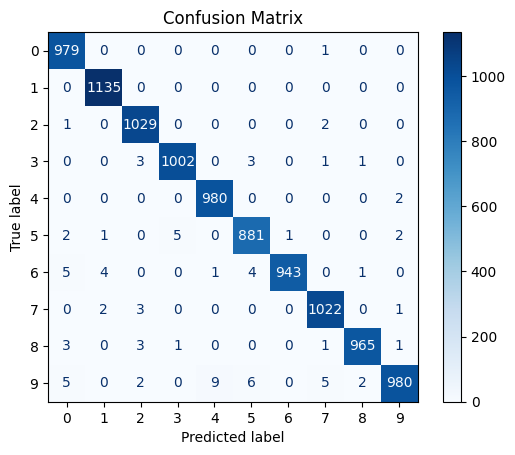

In [ ]:
#test model 1
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('attendance_digit_model_original.h5')

# Load and preprocess the MNIST test data
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#build_and_train_model_original_modified() #train model 2

Epoch 1/10


c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7812 - loss: 0.7193 - val_accuracy: 0.9755 - val_loss: 0.0827
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 40ms/step - accuracy: 0.9555 - loss: 0.1391 - val_accuracy: 0.9831 - val_loss: 0.0555
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9728 - loss: 0.0880 - val_accuracy: 0.9859 - val_loss: 0.0475
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9780 - loss: 0.0717 - val_accuracy: 0.9891 - val_loss: 0.0403
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9823 - loss: 0.0574 - val_accuracy: 0.9893 - val_loss: 0.0381
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9860 - loss: 0.0452 - val_accuracy: 0.9906 - val_loss: 0.0365
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9876 - loss: 0.0365 - val_accuracy: 0.9896 - val_loss: 0.0376
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9893 - loss: 0.03

Test Accuracy: 0.9919
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


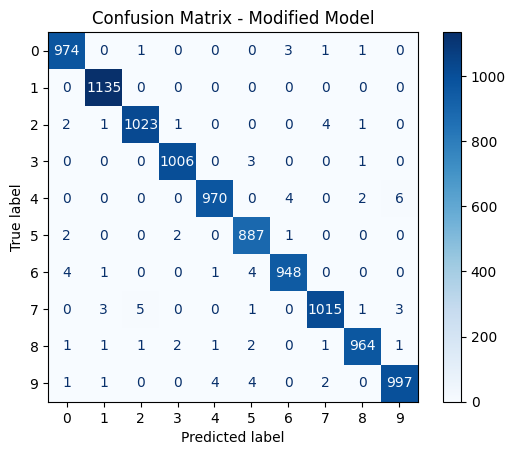

In [54]:
# test model 2
model = tf.keras.models.load_model('attendance_digit_model_original_modified.h5')

# Load and preprocess the MNIST test data
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Modified Model")
plt.show()


In [ ]:
#build_and_train_model_original_modified_augmented()  #train model 3

Epoch 1/10


c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.6283 - loss: 1.1735 - val_accuracy: 0.9686 - val_loss: 0.1041
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9096 - loss: 0.2900 - val_accuracy: 0.9787 - val_loss: 0.0740
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.9377 - loss: 0.2043 - val_accuracy: 0.9735 - val_loss: 0.0915
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9508 - loss: 0.1640 - val_accuracy: 0.9832 - val_loss: 0.0554
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.9587 - loss: 0.1386 - val_accuracy: 0.9873 - val_loss: 0.0439
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.9616 - loss: 0.1276 - val_accuracy: 0.9858 - val_loss: 0.0453
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9667 - loss: 0.1125 - val_accuracy: 0.9874 - val_loss: 0.0466
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9682 - loss: 0.10

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9899 - loss: 0.0333
Test accuracy: 0.9909, Test loss: 0.0293


Test Accuracy: 0.9909
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


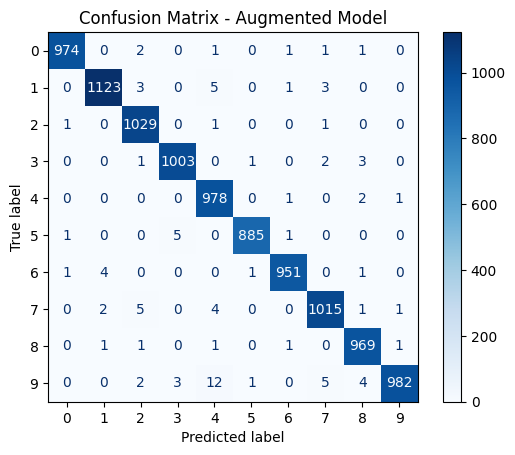

In [56]:
# test model 3

model = tf.keras.models.load_model('attendance_digit_model_original_modified_augmented.h5')

# Load and preprocess the MNIST test data
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Augmented Model")
plt.show()


In [ ]:
#build_and_train_model_from_custom_data(r'D:\EUI 3rd year\2nd semester\AI\Project\Scanvas\apps\ocr-service\CNN_Model') #train model 4

Epoch 1/10


c:\Users\Computer Store\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.2222 - loss: 3.6693
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5920 - loss: 1.3045
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.7477 - loss: 0.7799
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.8204 - loss: 0.5763
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8682 - loss: 0.4445
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9054 - loss: 0.3132
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9362 - loss: 0.2379
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9462 - loss: 0.1990
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9601 - loss: 0.1438
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9646 - loss: 0.1155


In [ ]:
#build_and_train_model_from_custom_data_augmented(r'D:\EUI 3rd year\2nd semester\AI\Project\Scanvas\apps\ocr-service\CNN_Model')  #train model 5

Epoch 1/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 53s 83ms/step - accuracy: 0.5106 - loss: 1.6721
Epoch 2/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 51s 84ms/step - accuracy: 0.8906 - loss: 0.3594
Epoch 3/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 49s 80ms/step - accuracy: 0.9502 - loss: 0.1589
Epoch 4/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 59s 97ms/step - accuracy: 0.9724 - loss: 0.0896
Epoch 5/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 52s 85ms/step - accuracy: 0.9811 - loss: 0.0595
Epoch 6/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 52s 85ms/step - accuracy: 0.9847 - loss: 0.0444
Epoch 7/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 51s 84ms/step - accuracy: 0.9893 - loss: 0.0313
Epoch 8/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - accuracy: 0.9913 - loss: 0.0251
Epoch 9/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 46s 76ms/step - accuracy: 0.9936 - loss: 0.0211
Epoch 10/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 52s 86ms/step - accuracy: 0.9921 - loss: 0.0297


In [ ]:
#build_and_train_model_6()  #train model 6

In [81]:
# upload the model
from tensorflow.keras.models import load_model
model = load_model('./model6.h5')  #upload any model you want

In [82]:
from PIL import Image

def load_and_preprocess_image(path):
    img = Image.open(path)
    return img

def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in sorted(os.listdir(folder)):
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            path = os.path.join(folder, filename)
            img = Image.open(path).convert("L")
            # img = np.array(img) / 255.0  # normalize
            # img = 1 - img  # invert
            # img = img.reshape(28, 28, 1)
            images.append(img)
            filenames.append(filename)
    return np.stack(images), filenames  # <- stack into one tensor

First 5 images:


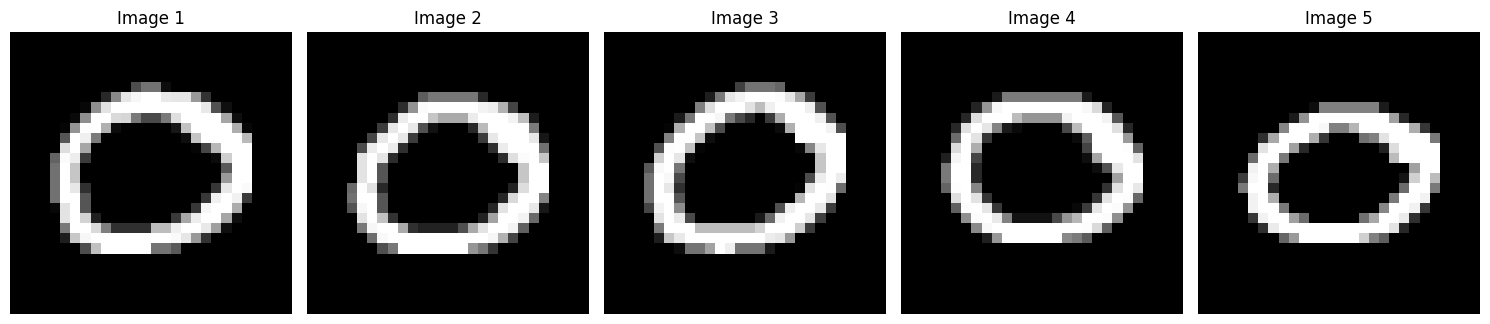


Last 5 images:


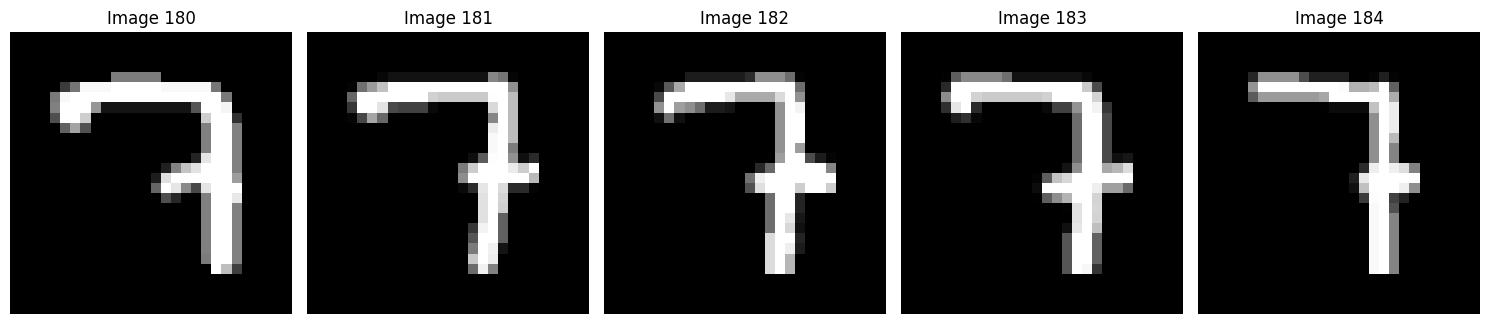

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
id_cell_001.png ➤ 0
id_cell_002.png ➤ 0
id_cell_003.png ➤ 0
id_cell_004.png ➤ 0
id_cell_005.png ➤ 0
id_cell_006.png ➤ 0
id_cell_007.png ➤ 0
id_cell_008.png ➤ 0
id_cell_009.png ➤ 1
id_cell_010.png ➤ 1
id_cell_011.png ➤ 1
id_cell_012.png ➤ 1
id_cell_013.png ➤ 1
id_cell_014.png ➤ 1
id_cell_015.png ➤ 1
id_cell_016.png ➤ 1
id_cell_017.png ➤ 7
id_cell_018.png ➤ 2
id_cell_019.png ➤ 2
id_cell_020.png ➤ 2
id_cell_021.png ➤ 2
id_cell_022.png ➤ 2
id_cell_023.png ➤ 2
id_cell_024.png ➤ 2
id_cell_025.png ➤ 3
id_cell_026.png ➤ 3
id_cell_027.png ➤ 3
id_cell_028.png ➤ 3
id_cell_029.png ➤ 3
id_cell_030.png ➤ 3
id_cell_031.png ➤ 3
id_cell_032.png ➤ 3
id_cell_033.png ➤ 4
id_cell_034.png ➤ 4
id_cell_035.png ➤ 4
id_cell_036.png ➤ 4
id_cell_037.png ➤ 4
id_cell_038.png ➤ 4
id_cell_039.png ➤ 4
id_cell_040.png ➤ 4
id_cell_041.png ➤ 5
id_cell_042.png ➤ 5
id_cell_043.png ➤ 5
id_cell_044.png ➤ 5
id_cell_045.png ➤ 5
id_cell_046.png ➤ 5
id_cell_047.png ➤ 5
id_cell_048.png ➤ 5
id

In [83]:
import os
# Load all images
image_folder = "../images/final_clean_cells/"
images, filenames = load_images_from_folder(image_folder)

# Function to display images
def display_images(images, titles, rows, cols, figsize=(15, 5)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        ax = axes[i//cols, i%cols] if rows > 1 else axes[i]
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Display first 5 images
print("First 5 images:")
display_images(images[:5], [f"Image {i+1}" for i in range(5)], 1, 5)

# Display last 5 images
print("\nLast 5 images:")
display_images(images[-5:], [f"Image {len(images)-4+i}" for i in range(5)], 1, 5)

# Predict on the full batch
prediction = model.predict(images)
predicted_digits = np.argmax(prediction, axis=1)

# Output results
for fname, digit in zip(filenames, predicted_digits):
    print(f"{fname} ➤ {digit}")

#### -------------------------------------------- Complexity Analysis   --------------------------------------------

| Component              | Time Complexity | Space Complexity |
| ---------------------- | --------------- | ---------------- |
| Load model             | O(1)            | O(M)             |
| Load & preprocess data | O(N)            | O(N)             |
| Evaluate model         | O(N × P)        | O(N × C)         |
| Predict                | O(N × P)        | O(N × C)         |
| Confusion matrix       | O(N)            | O(C²)            |
| Plotting               | O(C²)           | O(C²)            |


# Project Done